# // Computing with Language: Simple Statistics
___

In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Warming into the chapter....

In [2]:
saying = "After all is said and done more is said than done".split(" ")
tokens = sorted(set(saying))
tokens[-2:]

['said', 'than']

## 3.1 Frequency Distributions

- Determining the frequency of each vocabulary item in the text

Trying it out on Moby Dick:

In [3]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [4]:
print(fdist1.most_common(50))

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]


In [5]:
fdist1['whale']

906

Looking at that above info visually:

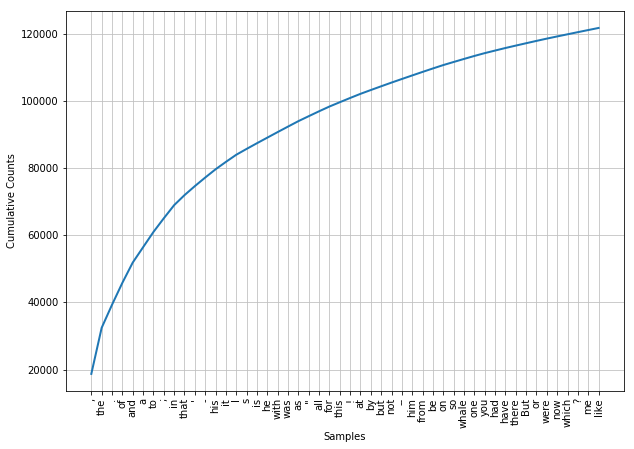

In [6]:
plt.figure(figsize=(10,7))
fdist1.plot(50, cumulative=True);

Maybe looking at infrequent words? `.hapaxes()` can be used to find *hapaxes* or words that only occur once.

In [7]:
print(fdist1.hapaxes()[0:51])

['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School', 'threadbare', 'lexicons', 'mockingly', 'flags', 'mortality', 'signification', 'HACKLUYT', 'Sw', 'HVAL', 'roundness', 'Dut', 'Ger', 'WALLEN', 'WALW', 'IAN', 'RICHARDSON', 'KETOS', 'GREEK', 'CETUS', 'LATIN', 'WHOEL', 'ANGLO', 'SAXON', 'WAL', 'HWAL', 'SWEDISH', 'ICELANDIC', 'BALEINE', 'BALLENA', 'FEGEE', 'ERROMANGOAN', 'Librarian', 'painstaking', 'burrower', 'grub', 'Vaticans', 'stalls', 'higgledy', 'piggledy', 'gospel', 'promiscuously', 'commentator', 'belongest', 'sallow']


Doesn't seem super helpful without any context or anything...

## 3.2 Fine-grained Selection of Words

Starting out by looking at the long words of a text:

In [8]:
V = set(text4)
long_words = set([w for w in V if len(w) > 15])
print(sorted(long_words))

['RESPONSIBILITIES', 'antiphilosophists', 'constitutionally', 'contradistinction', 'discountenancing', 'disqualification', 'enthusiastically', 'instrumentalities', 'internationality', 'irresponsibility', 'misappropriation', 'misrepresentation', 'misunderstanding', 'responsibilities', 'sentimentalizing', 'transcontinental', 'uncharitableness', 'unconstitutional']


Seems...still not super useful?

What about _frequently occuring_ long words:

In [9]:
fdist5 = FreqDist(text5)
print(sorted([w for w in set(text5) if len(w) >= 7 and fdist5[w] >7]))

['#14-19teens', '#talkcity_adults', '((((((((((', '.......', '........', '<empty>', 'Question', 'Welcome', 'actually', 'already', 'another', 'anybody', 'anything', 'awesome', 'because', 'computer', 'cute.-ass', 'evening', 'everyone', 'females', 'fingers', 'football', 'getting', 'innocent', 'kidding', 'listening', 'looking', 'minutes', 'morning', 'myspace', 'nothing', 'profile', 'remember', 'seconds', 'seriously', 'someone', 'something', 'talking', 'thought', 'together', 'tomorrow', 'tonight', 'watches', 'watching', 'welcome', 'whisper', 'without']


## Collocations and Bigrams

- A **collocation** is a sequence of words that occur together unusually often i.e. *red wine* (is) vs *the wine* (is not)
- **bigrams**: word pairs

In [10]:
list(bigrams(saying))

[('After', 'all'),
 ('all', 'is'),
 ('is', 'said'),
 ('said', 'and'),
 ('and', 'done'),
 ('done', 'more'),
 ('more', 'is'),
 ('is', 'said'),
 ('said', 'than'),
 ('than', 'done')]

vs.

In [13]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [14]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


# Counting Other Things

In [17]:
fdist = FreqDist(len(w) for w in text1)
fdist

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [18]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [19]:
# Most frequent word length
fdist.max()

3

In [20]:
# Words of length 3 account for ~50,000 words
fdist[3]

50223

In [21]:
# Words of length 3 account for ~20% of the words making up the book
fdist.freq(3)

0.19255882431878046

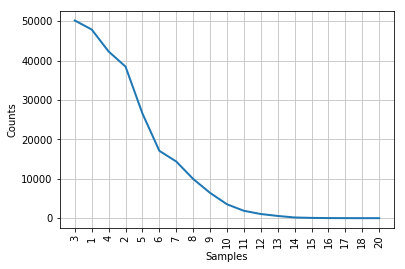

In [26]:
# Visualize it
fdist.plot()

In [24]:
# Total number of samples
fdist.N()

260819

In [27]:
# Test if samples in one occur more than in the other
fdist < fdist5

False

# // On to the next one!